## Preprocessing : V2

In [1]:
### For this particular project, I haven't differentiate the data earlier 
### for the distance and the tree based algorithms
### so here, I will try to repeat the same and go for the predictions afterwards

In [33]:
### I am dropping the (year column from the dataset) becuase it contains only one unique value : 2019
### It provides like 0 variance for the data

### ----------------loading the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### -------------------loading the data

In [3]:
### I won't be doing featured engineering and everything from scratch, but instead,
### my strategy is to load the already cleaned data and check the graphs and 
### apply the scaling/transformation for the distance based models

In [9]:
### so, basically (clean_final_df) file will stay as it is,
### because we don't use it and I won't be transforming/scaling it
### but as far as it comes to the (clean_train/test) file
### I will save as it for the tree based models and 
### transform/scale/remove outliers for the distance based models

In [35]:
df = pd.read_csv('../data/preprocessed/general/clean_final_df.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4


In [36]:
df_train = pd.read_csv('../data/preprocessed/general/clean_train.csv')
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'year'], axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4,13302.0


In [37]:
df_test = pd.read_csv('../data/preprocessed/general/clean_test.csv')
df_test.drop(['Unnamed: 0', 'year'], axis = 1, inplace = True)
df_test.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,17,30,4,25,10
1,3,3,1.0,1,0,0,1,12,5,6,20,10,20,4
2,4,4,1.0,0,1,0,0,21,5,19,15,19,0,23
3,4,4,1.0,0,0,1,1,21,5,8,0,21,0,13
4,2,2,3.0,0,0,1,1,24,6,23,55,2,45,2


In [38]:
print(f"{df.shape} : {df_train.shape} : {df_test.shape}")

(13351, 14) : (10681, 15) : (2670, 14)


### ----------------for the tree based models

In [14]:
### the data is good and perfect for the tree base models, 
### no transformation/scaling/outliers needs to be removed

In [39]:
base_path = '../data/preprocessed/trees/'
df_train.to_csv(base_path + 'train.csv')
df_test.to_csv(base_path + 'test.csv')

### --------------------for the distance based models

In [18]:
### here the strategy is gonna be bit different, since we have 2 seprate versions
### one without the 'price' coumn and one with the 'price' column
### so, my strategu will be to do all the operations from our (clean_final_df) file and 
### then, use the same sclaer object for the price column as well

In [40]:
df_train = pd.read_csv('../data/preprocessed/general/clean_train.csv')
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'year'], axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2,3897.0
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7,7662.0
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19,13882.0
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5,6218.0
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4,13302.0


In [41]:
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,16,50,21,35,4


In [42]:
df_subset = df[['day', 'month', 'dep_hour', 'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hours']]

In [43]:
df_subset.head()

,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,24,3,22,20,1,10,2
1,1,5,5,50,13,15,7
2,9,6,9,25,4,25,19
3,12,5,18,5,23,30,5
4,1,3,16,50,21,35,4


### ---------------qq plot template and check for the distribution

In [44]:
import scipy.stats as stat
import pylab

In [62]:
def plot_qq(df, feature) : 
    plt.figure(figsize = (8, 4))
    plt.title(feature)
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

In [63]:
def plot_qq_all(df) : 
    for i, cols in enumerate(df.columns) : 
        plot_qq(df, cols)

In [ ]:
# for i, cols in enumerate(df_subset.columns) : 
#     print(f"{i} : {cols}")
# df.columns

In [67]:
# plot_qq(df, 'day')

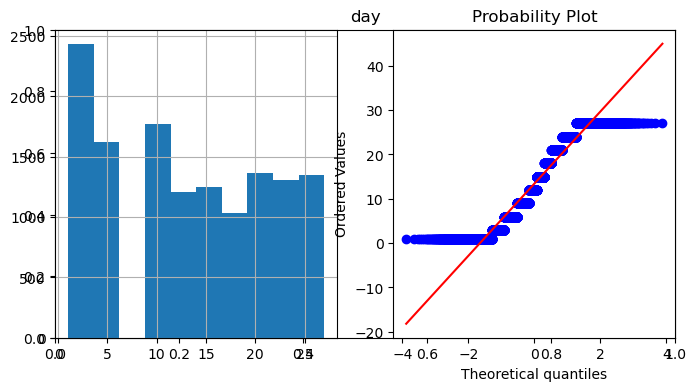

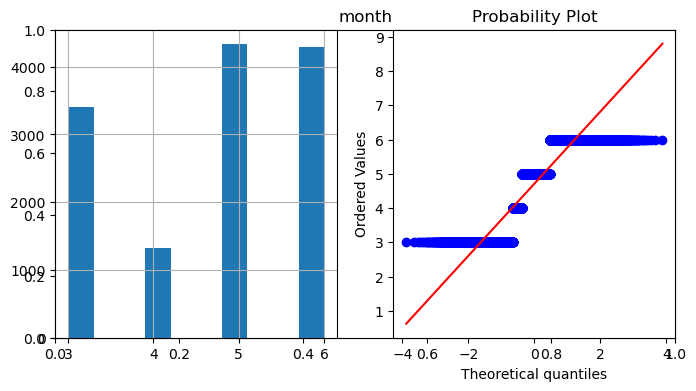

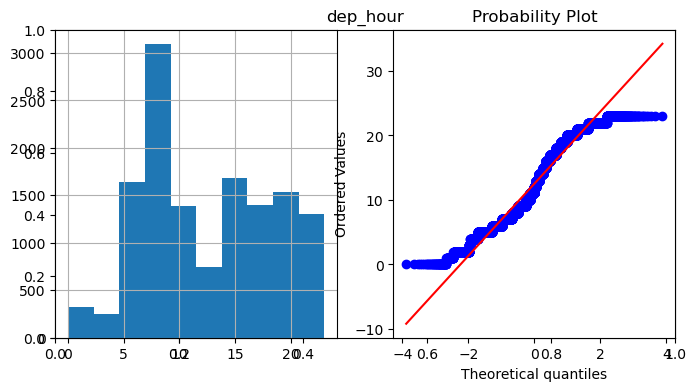

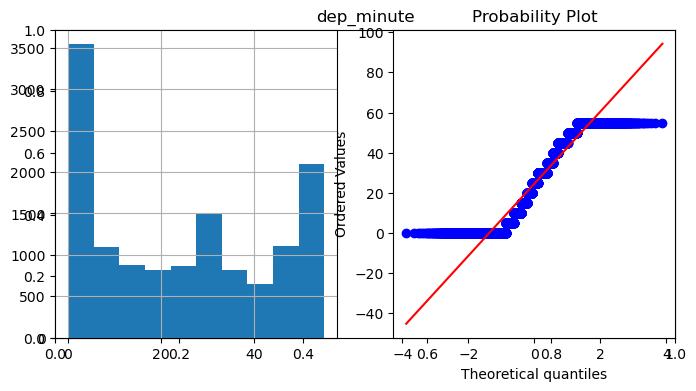

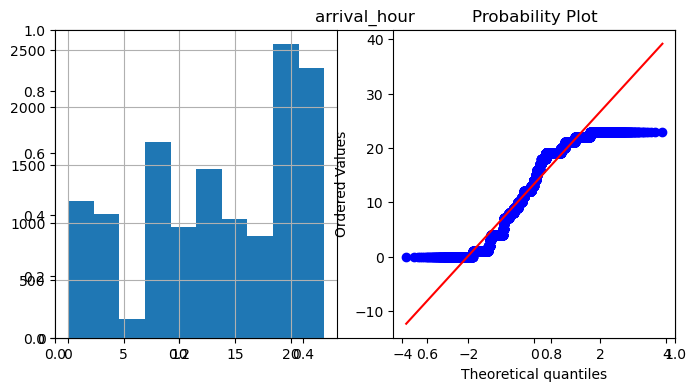

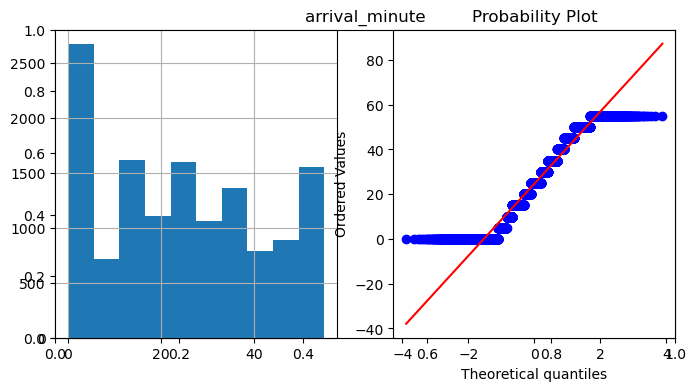

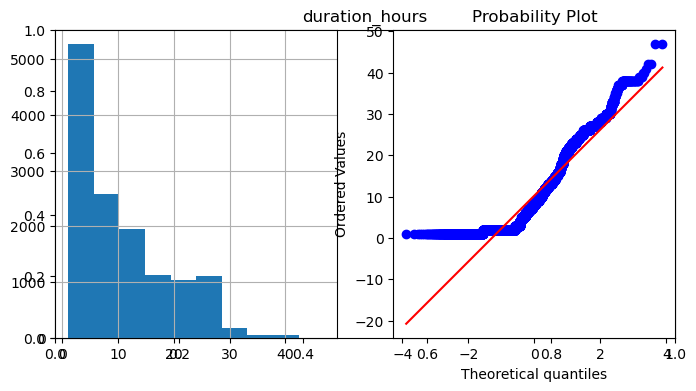

In [65]:
# ---------------needs to fix that part tomorrow
plot_qq_all(df_subset)